In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


Since we are dealing with images we need matplotlib to display the image

# 1. Data Cleaning and Preparation

In [2]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
sss  = x_train

In [4]:
x_train.shape

(60000, 28, 28)

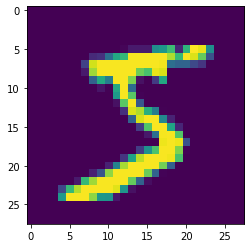

In [5]:
plt.imshow(x_train[0])

With conventional neural networks we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors each of size 1x(28X28) = 1 x 784

In [6]:
num_pixels = x_train.shape[1]*x_train.shape[2] #Find the size of one dimentional vector

In [7]:
x_train = x_train.reshape(x_train.shape[0],num_pixels).astype('float32') #Flatten training images
x_test = x_test.reshape(x_test.shape[0],num_pixels).astype('float32') #Flatten test images

Normalize the image vector

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
#One hot encode the outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


# 2. Build a Neural Network

In [10]:
def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape = (num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    #Compile the model
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 3. Train and Test the Network

In [11]:
#build the model
model = classification_model()

#fit the model
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 10, verbose = 2)

#evalate the model

scores = model.evaluate(x_test, y_test, verbose = 0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 49s - loss: 0.1847 - accuracy: 0.9439 - val_loss: 0.0986 - val_accuracy: 0.9686
Epoch 2/10
 - 47s - loss: 0.0781 - accuracy: 0.9753 - val_loss: 0.0911 - val_accuracy: 0.9710
Epoch 3/10
 - 51s - loss: 0.0537 - accuracy: 0.9827 - val_loss: 0.0817 - val_accuracy: 0.9758
Epoch 4/10
 - 48s - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0769 - val_accuracy: 0.9797
Epoch 5/10
 - 49s - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0628 - val_accuracy: 0.9826
Epoch 6/10
 - 43s - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0797 - val_accuracy: 0.9799
Epoch 7/10
 - 42s - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0965 - val_accuracy: 0.9753
Epoch 8/10
 - 55s - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0796 - val_accuracy: 0.9798
Epoch 9/10
 - 50s - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0959 - val_accuracy: 0.9792
Epoch 10/10
 - 55s - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0910 - val_accuracy: 0.9795


# 4. Check the Accuracy of the Model

In [12]:
print('Accuracy: {}% \nError: {}'.format(scores[1],1-scores[1]))

Accuracy: 0.9794999957084656% 
Error: 0.020500004291534424


# 5. Save the Model

In [13]:
model.save('classification_model.h5')

# 6. Load the Model

In [15]:
from keras.models import load_model

In [16]:
pretrained_model = load_model('classification_model.h5')

In [17]:
pretrained_model.predict(x_test[:1])

array([[2.7091343e-12, 4.9527410e-11, 2.2596680e-11, 4.9208604e-10,
        4.6180513e-13, 3.0492136e-14, 1.8725756e-16, 9.9999976e-01,
        1.4118831e-12, 2.0475137e-07]], dtype=float32)

In [34]:
import numpy as np
out = pretrained_model.predict(x_test)

In [35]:
print(out)

[[2.70913435e-12 4.95274100e-11 2.25967214e-11 ... 9.99999762e-01
  1.41188309e-12 2.04751558e-07]
 [1.29219352e-20 1.21574544e-07 9.99999881e-01 ... 2.12349224e-17
  1.98170697e-25 6.08769601e-24]
 [8.75682249e-17 1.00000000e+00 6.07939699e-10 ... 1.13188712e-11
  2.78378362e-12 2.31350617e-15]
 ...
 [1.68580210e-19 3.35915352e-15 3.39621769e-18 ... 3.13220457e-11
  4.26597334e-11 3.40444228e-10]
 [7.92766910e-21 5.62840986e-19 2.47762088e-23 ... 3.61491554e-15
  8.37809802e-13 1.68425941e-19]
 [7.24202158e-15 2.14546166e-16 6.33336593e-17 ... 9.84970464e-22
  1.04605696e-13 2.25196224e-15]]
